# Table of Contents
 <p><div class="lev1 toc-item"><a href="#geopandas-installation-instructions" data-toc-modified-id="geopandas-installation-instructions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>geopandas installation instructions</a></div><div class="lev1 toc-item"><a href="#GIS-type-files" data-toc-modified-id="GIS-type-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GIS type files</a></div><div class="lev2 toc-item"><a href="#Take-a-peek-into-a-GIS-file" data-toc-modified-id="Take-a-peek-into-a-GIS-file-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Take a peek into a GIS file</a></div><div class="lev2 toc-item"><a href="#Points" data-toc-modified-id="Points-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Points</a></div><div class="lev2 toc-item"><a href="#Polygons" data-toc-modified-id="Polygons-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Polygons</a></div><div class="lev1 toc-item"><a href="#Geojson" data-toc-modified-id="Geojson-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Geojson</a></div><div class="lev1 toc-item"><a href="#Shape-files" data-toc-modified-id="Shape-files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shape files</a></div><div class="lev1 toc-item"><a href="#Coordinates" data-toc-modified-id="Coordinates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Coordinates</a></div><div class="lev2 toc-item"><a href="#converting-coordinates" data-toc-modified-id="converting-coordinates-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>converting coordinates</a></div><div class="lev1 toc-item"><a href="#Geometric-opertions-with-shaped" data-toc-modified-id="Geometric-opertions-with-shaped-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Geometric opertions with shaped</a></div><div class="lev1 toc-item"><a href="#Additional-examples" data-toc-modified-id="Additional-examples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Additional examples</a></div>

In [1]:
__author__ = 'Federica B. Bianco CUSP-NYU'

# geopandas installation instructions 
http://geopandas.org/install.html 
We recommand the anaconda installation, and installing fiona and shapely first.

In [2]:
from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# GIS type files

We will use geocoded data with geographical information stored in 2 formats: geojson and shapefiles (.shp)

Geojson: these are json format files with a geometry entry, called the_geom or geometry. The geometry entry is populated by GIS shapes, which can be points, polygons, multipolygons for more complex shapes). These are suitable for hybrid tabular datasets, which can contain all sort of information associated to a shape: e.g. zipcode geography and zipcode population. 

Shapefiles: these are not single files, but sets of files one of which is a shapefile (.shp) and are generally downloaded as a zipfile or tarball. The files other than the .shp ext
ension are needed to read in the shapefile correctly, so although we refer to them collectively as "shapefile" and we explictly only load the .shp file we need the other formats as well. 



## Take a peek into a GIS file
lets take a peek at a .geojson file


In [3]:
!pwd
!head -3 NYC_shapefiles/Police\ Precincts.geojson

/Users/fbianco/science/Dropbox/randomprojs/smart_cities
{
  "type": "FeatureCollection",
  "features": [


That looks just like a json file, but if I tried and print one more line I would crush the python kernel: 

the next json entry is the "feature", which contains the geometry, which is a very long list of points that design the permeter of the first precinct, and since administrative (and generally geographical) shapes can be far more complex than say a square or a circle this is a very long list of coorcinates. 

{

  "type": "FeatureCollection",
  
  "features": [
  
    {"type":"Feature","properties":{"precinct":"1","shape_area":"47182160.4145","shape_leng":"79979.409545"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-74.0438776157395,40.69018767637665],[-74.0435059601254,40.68968735963635],[-74.04273533826982,40.69005019142044],[-74.04278433380006,40.69012097669115],[-74.04270428426766,40.690155204644306],[-74.04255372037308,40.6899627592896],[-74.0426392937119,40.68992817641333],[-74.0426938081918,40.689997259107216],[-74.04346752310265,40.68963699010347],[-74.04351637245855,40.68919103374234],[-74.04364078627412,40.68876655957014],[-74.04397458556184,40.68858240705591],[-74.0443852177728,40.688516178402686],[-74.04478399040363,40.68859566011588],[-74.04627539003668,40.689327425896714],[-74.04680284898575,40.68995325626601],[-74.04747651462345,40.68961136999828],[-74.04772962763064,40.68991531846602],[-74.04758571924786,40.68998250682616],[-74.04743126123475,40.68980388996831],[-74.04.GeoF689205500591,40.69005909832262],[-74.04720029366251,40.69042481562375],[-74.04711050698607,40.69047041285008],[-74.04711582042361,40.6906558061182]...

Let's step back and take a look at more trivial shapes for a second:


## Points

geometric shapes are defined in the shapely package

In [4]:
#the simplest geometry is a point
from shapely.geometry import Point
pt1 = Point((0, 0.5))
pt2 = Point((0.2, 0.1))
pt3 = Point((0, 0.3))


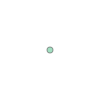

In [5]:
#points know how to plot themselves
pt1

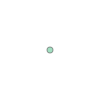

In [6]:
#but without context that does not mean much...
pt2

In [7]:
#we can crete a geopandas GDF from these geometry point objects
pointsGPD = gpd.GeoDataFrame()
pointsGPD["geometry"] = [pt1, pt2, pt3]

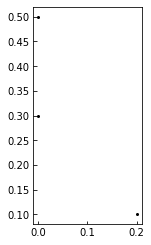

In [8]:
#geopandas GDF also know how to plot themselves
pointsGPD.plot(color="k")

## Polygons

In [9]:
from shapely.geometry import Polygon
#polygons are defined by straight lines joining points on their perimeter
pg1 = Polygon([(0, 0), (1, 0), (1, 1)])


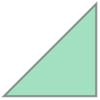

In [10]:
#shapely polygons know how to plot themselves
pg1

Self-intersection at or near point 0.56666666666666665 0.33333333333333331


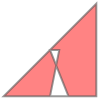

In [11]:
#polygons can have interior wholes
#note also that the order of the corners matters
pg2 = Polygon([(0, 0), (1, 0), (1, 1)], [[(0.5, 0), (0.7, 0), (0.5, 0.5), (0.6, 0.5)]])
pg2

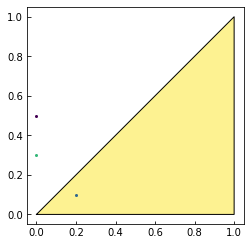

In [12]:
#we can crete a geopandas GDF from these hybrid geometry objects
pointsPolygGPD = gpd.GeoDataFrame()
pointsPolygGPD["geometry"] = [pt1,pt2,pt3, pg1]
pointsPolygGPD.plot()

# Geojson

Now let's load the geojson file we look briefly at before: we do that using the geopandas package, which interacts well with pandas objects, share many of the pandas functionalities, but has additional functions and objects that deal with GIS information

the main geopandas object is a geopandas GeoDataFrame (we have seen them before)


In [13]:
precincts = gpd.GeoDataFrame.from_file("NYC_shapefiles/Police Precincts.geojson")

GeoDataFrames look like dataframes in pandas: tabulated objects 


In [14]:
precincts.head()

,geometry,precinct,shape_area,shape_leng
0,(POLYGON ((-74.0438776157395 40.69018767637665...,1,47182160.4145,79979.409545
1,(POLYGON ((-73.98863862848766 40.7229337202636...,5,18088797.9526,18676.1242594
2,(POLYGON ((-73.99968392160721 40.7385522486597...,6,22131930.5198,27182.610113
3,(POLYGON ((-73.97345324119571 40.7189628870822...,7,18363326.3567,17301.4925491
4,(POLYGON ((-73.97160900246391 40.7267234011698...,9,21394013.3755,19773.4018725


but they have a geometry column which hosts the shapes, which can be points, polygons, or multipolygons


In [15]:
precincts.geometry

0     (POLYGON ((-74.0438776157395 40.69018767637665...
1     (POLYGON ((-73.98863862848766 40.7229337202636...
2     (POLYGON ((-73.99968392160721 40.7385522486597...
3     (POLYGON ((-73.97345324119571 40.7189628870822...
4     (POLYGON ((-73.97160900246391 40.7267234011698...
5     (POLYGON ((-74.00138603698601 40.7628500950018...
6     (POLYGON ((-73.98155997085217 40.7438818833470...
7     (POLYGON ((-73.97464798076284 40.7533671226278...
8     (POLYGON ((-73.96421230395677 40.7466043184766...
9     (POLYGON ((-73.99393666655916 40.7731798458359...
10    (POLYGON ((-73.94471650134327 40.7697865052794...
11    (POLYGON ((-73.96933573385066 40.7852932795572...
12    (POLYGON ((-73.94923186072994 40.7968730719466...
13    (POLYGON ((-73.93224093714262 40.7896948816873...
14    (POLYGON ((-73.95964685423152 40.8011564232564...
15    (POLYGON ((-73.93804640603439 40.7808295442755...
16    (POLYGON ((-73.94607828740384 40.8212632160622...
17    (POLYGON ((-73.94131742369481 40.807713346

geodataframes know how to plot themselves!
`

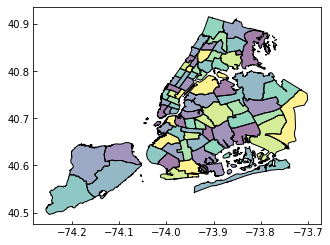

In [16]:
precincts.plot()

We can make a choropleth of this simple map: a map that is colorcoded by the value of one of the columns in the GDF. Here lets trivially colorcode the precicts by their area

In [17]:
precincts.plot?

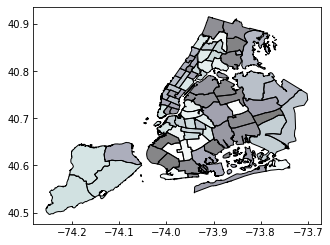

In [18]:
precincts.plot(column="shape_area", cmap="bone")

The details of how embellish a choropleth, such as for example put a colorbar, adjust axes, lines etc, are a bit painful. However, I created a python module that will help you make choropleths of any NYC GDF: it is fine-tuned to the shape of NYC and it makes it easier to add colorbars etc, you can download it here https://github.com/fedhere/choroplethNYC

In [19]:
import choroplethNYC

In [20]:
choroplethNYC.choroplethNYC?

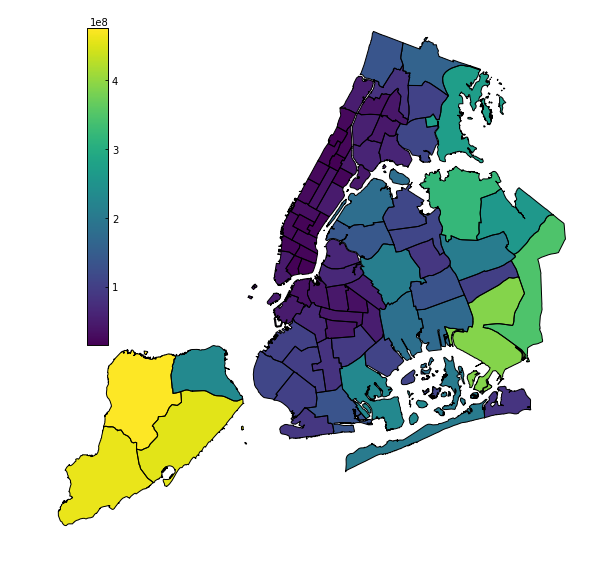

In [21]:
fig, ax, cb = choroplethNYC.choroplethNYC(precincts, "shape_area", cb=True)

# Shape files

shapefiles can also be read into GDFs with geopandas. Generally they are zipped directories when you download them

In [24]:
!unzip NYC_shapefiles/Police\ Precincts.zip
!ls

Archive:  NYC_shapefiles/Police Precincts.zip
  inflating: geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.dbf  
  inflating: geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.shp  
  inflating: geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.shx  
  inflating: geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.prj  
NYC_RoadLength_by_ZIP.csv
NYC_shapefiles
Untitled.ipynb
Untitled1.ipynb
UsingShapeFiles.ipynb
ZIP_CODE_040114.dbf
ZIP_CODE_040114.prj
ZIP_CODE_040114.sbn
ZIP_CODE_040114.sbx
ZIP_CODE_040114.shp
ZIP_CODE_040114.shp.xml
ZIP_CODE_040114.shx
ZIP_CODE_040114.zip
census00_metadata.csv
census10_metadata.csv
census10_metadata.numbers
checkCrimeData.ipynb
crime_data.py
geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.dbf
geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.prj
geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.shp
geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.shx
getStreetLengthByZIP.ipynb
link.csv
nyu_2451_34510.zip
sort_by_pct_total.csv
sort_by_pct_total.xls
tmp


the files got unpacked under thename geo_export_be3a4049-303e-42f1-a875-70e07e3011a3

and you need to read in only the shape file explicitly, though you need the other files to exist in the same directory for the shapefile to be read correctly:

In [25]:
gpd.GeoDataFrame.from_file("geo_export_be3a4049-303e-42f1-a875-70e07e3011a3.shp")

,geometry,precinct,shape_area,shape_leng
0,(POLYGON ((-74.0438776157395 40.69018767637665...,1.0,4.718213e+07,79979.389271
1,POLYGON ((-73.98863862848766 40.72293372026369...,5.0,1.808880e+07,18676.124259
2,POLYGON ((-73.99968392160721 40.73855224865976...,6.0,2.213193e+07,27182.610113
3,POLYGON ((-73.97345324119571 40.71896288708222...,7.0,1.836339e+07,17301.475777
4,POLYGON ((-73.97160900246391 40.72672340116989...,9.0,2.139401e+07,19773.401872
5,POLYGON ((-74.00138603698601 40.76285009500188...,10.0,2.722863e+07,40043.175251
6,POLYGON ((-73.98155997085217 40.74388188334704...,13.0,2.950966e+07,27735.246247
7,POLYGON ((-73.97464798076284 40.75336712262782...,14.0,2.051016e+07,20974.709243
8,(POLYGON ((-73.96421230395677 40.7466043184766...,17.0,2.227428e+07,26848.186307
9,POLYGON ((-73.99393666655916 40.77317984583595...,18.0,3.228033e+07,42179.905777


# Coordinates

Now let's spend a second discussing what the numbers we read in the geometry feature actually mean: geographies are represented on a 2D medium (screen, paper) by chosing a projection to draw spherical surfaces on a plane. Any projection causes some degree of deformation. In GIS convension different numbers indicate different projections. We will use the EPSG conventions. Once we choose the projection each point in our geography is identified uniquely by 2 numbers, the coordinates. For NYC there are 2 main coordinates system in use:

**epsg = 4326 latitude-longitude (also known as WGS84).** Equatorial coordinates. The numnbers are in degrees. The precinct file above is in epsg 4326. 40.7128° N, 74.0059° W are the geographical coordinates of NYC (Manhattan City Hall). Notice that equatorial coordinates can be identified with +/- signs, or E/W and N/S, but in GIS the +/- is the only thing that makes sense, because we want to deal with numbers.
https://en.wikipedia.org/wiki/World_Geodetic_System WGS84 comprises a standard coordinate frame for the Earth, a datum/reference ellipsoid for raw altitude data, and a gravitational equipotential surface (the geoid) that defines the nominal sea level.

**epsg = 2263 New York Long Island (ftUS) (also NAD83).** The State Plane Coordinate System (SPCS) is a set of 124 geographic zones or coordinate systems designed for specific regions of the United States. By ignoring the curvature of the Earth it uses a simple Cartesian coordinate system to specify locations rather than a more complex spherical coordinate system. Therefore each "zone" is only accurate in the vicinity of its center. The most commonly used SPCS for NYC is the New York Long Island system. The coordinates are in feet, easting and northing (increasing numbers indicate farter east and farther north locations), notice that (0,0) is outside of the epsg = 2263 region!

## converting coordinates

In [26]:
#check is a coordinate system is set first:
precincts.crs

{'init': u'epsg:4326'}

In [27]:
from fiona.crs import from_epsg
## if the coordinates are not set they can be set with
#precincts.crs = from_epsg(4326) 
#after one understands what it may be, which may be tricky, but again, for NYC it is generally one of the systems below
## epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet

In [28]:
#convert to State Plane: for example this is needed to calculate areas, since epsg=2263 is in feet, while 4326 is in degrees

#area in feet sq
NYC_Area = precincts.to_crs(epsg=2263).geometry.area.sum()

#convert to miles sq
NYC_Area /= (2.788*10**7) 

print ('total NYC land area: {:.1f} (mi^2)'.format(NYC_Area))

total NYC land area: 302.2 (mi^2)


# Geometric opertions with shaped

let's read in the zipcodes, and find out which precincts are in Queens

In [29]:
#a shapefile with the 5 boroughs boundaries
boroughs = gpd.GeoDataFrame.from_file("NYC_shapefiles/Borough Boundaries.geojson")
boroughs

,boro_code,boro_name,geometry,shape_area,shape_leng
0,5,Staten Island,(POLYGON ((-74.05050806403247 40.5664220341608...,1623818619.17,330476.02653
1,2,Bronx,(POLYGON ((-73.89680883223774 40.7958084451597...,1186815932.04,463934.696838
2,1,Manhattan,(POLYGON ((-74.01092841268031 40.6844914725429...,636453907.24,358410.672987
3,3,Brooklyn,(POLYGON ((-73.86706149472118 40.5820879767934...,1937474462.47,741074.709979
4,4,Queens,(POLYGON ((-73.83668274106707 40.5949466970158...,3044834738.1,895762.746967


In [30]:
precincts.intersects(boroughs.iloc[4].geometry)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
47    False
48    False
49    False
50    False
51    False
52     True
53    False
54    False
55     True
56    False
57     True
58     True
59     True
60     True
61     True
62     True
63     True
64     True
65     True
66     True
67     True
68     True
69     True
70     True
71     True
72     True
73    False
74    False
75    False
76    False
dtype: bool

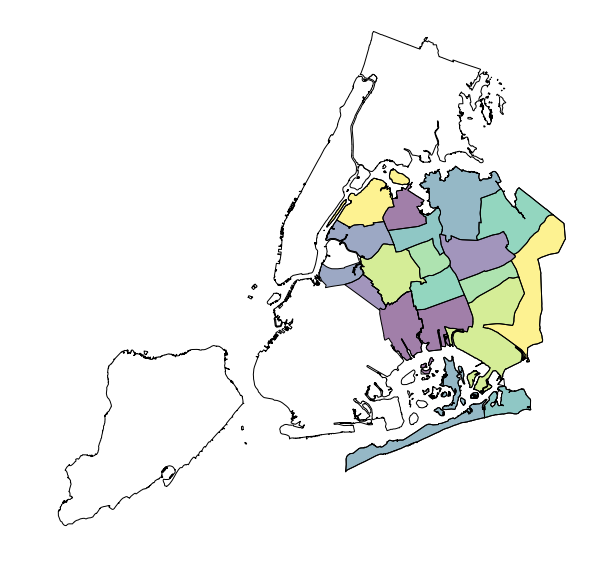

In [33]:
fig, ax = choroplethNYC.choroplethNYC(boroughs, alpha=0)
precincts[precincts.intersects(boroughs.iloc[4].geometry)].plot(ax=ax)

A lot more geometry exercises can be performed with geopandas. See here http://geopandas.org/geometric_manipulations.html

# Additional examples

Here are few additional examples of geopandas gymnastics:
    
https://github.com/fedhere/WIMLDSSmartCities/    in this repo you can find the code that generated the three choropleths in the hackathon blogpost http://www.wimldsdatadive.com/blog_posts/4

The NYU Center for Urban Science and Progress Principles of Urban Informatics class uses Geopandas and Sina Kusick wrote this beautiful lab notebook  https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb

Geoff Boeing teaches a similar class at Berkeley and here are some useful notebooks from the class https://github.com/gboeing/urban-data-science/tree/master/19-Spatial-Analysis-and-Cartography